In [1]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated
from statistics import mean
import seaborn as sns

from lifelines import KaplanMeierFitter
import pandas as pd

In [2]:
# Baseline attacker
baseline_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/baseline_standalone_d0_h50'))
baseline_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/baseline_standalone_d2_h0'))
baseline_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/baseline_layered_d2_h50'))

# DFS attacker
dfs_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/dfs_standalone_d0_h50'))
dfs_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/dfs_standalone_d2_h0'))
dfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/dfs_layered_d2_h50'))

# BFS attacker
bfs_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/bfs_standalone_d0_h50'))
bfs_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/bfs_standalone_d2_h0'))
bfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/bfs_layered_d2_h50'))

In [3]:
baseline_layered_d2_h50_times = get_data_exfiltration_times(baseline_layered_d2_h50, expected_files=12)
baseline_standalone_d0_h50_times = get_data_exfiltration_times(baseline_standalone_d0_h50, expected_files=12)
baseline_standalone_d2_h0_times = get_data_exfiltration_times(baseline_standalone_d2_h0, expected_files=12)

dfs_layered_d2_h50_times = get_data_exfiltration_times(dfs_layered_d2_h50, expected_files=12)
dfs_standalone_d0_h50_times = get_data_exfiltration_times(dfs_standalone_d0_h50, expected_files=12)
dfs_standalone_d2_h0_times = get_data_exfiltration_times(dfs_standalone_d2_h0, expected_files=12)

bfs_layered_d2_h50_times = get_data_exfiltration_times(bfs_layered_d2_h50, expected_files=12)
bfs_standalone_d0_h50_times = get_data_exfiltration_times(bfs_standalone_d0_h50, expected_files=12)
bfs_standalone_d2_h0_times = get_data_exfiltration_times(bfs_standalone_d2_h0, expected_files=12)

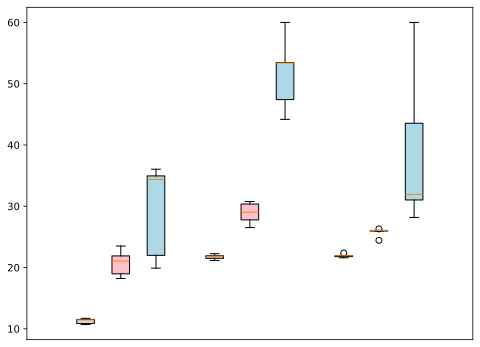

In [4]:
# Box plot comparing data exfiltration times
positions = [.3, .6, .9, 1.2, 1.5, 2.2]


baseline_data = [baseline_standalone_d2_h0_times['time_exfiltrated'], baseline_standalone_d0_h50_times['time_exfiltrated'], baseline_layered_d2_h50_times['time_exfiltrated']]
dfs_data = [dfs_standalone_d2_h0_times['time_exfiltrated'], dfs_standalone_d0_h50_times['time_exfiltrated'], dfs_layered_d2_h50_times['time_exfiltrated']]
bfs_data = [bfs_standalone_d2_h0_times['time_exfiltrated'], bfs_standalone_d0_h50_times['time_exfiltrated'], bfs_layered_d2_h50_times['time_exfiltrated']]

all_data = baseline_data + dfs_data + bfs_data

baseline_positions = [.3, .6, .9]
dfs_positions = [1.3, 1.6, 1.9]
bfs_positions = [2.3, 2.6, 2.9]
positions = [.3, .6, .9, 1.4, 1.7, 2.0, 2.5, 2.8, 3.1]

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(all_data, positions=positions, patch_artist=True, widths=0.15)

plt.xticks([])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')

# fill with colors
colors = ['lightgrey', 'pink', 'lightblue', 'lightgrey', 'pink', 'lightblue', 'lightgrey', 'pink', 'lightblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Output as svg
plt.savefig('./plots/adaptive_times.svg', transparent=True)

In [5]:
colors = ['tab:grey', 'tab:pink', 'tab:blue']

def plot_survival(df_list, ax, x_axis_low=0, x_axis_high=60):
    color_idx = 0

    for df in df_list:
        # Fit the Kaplan-Meier estimator
        kmf = KaplanMeierFitter()
        kmf.fit(df['time_exfiltrated'], df['survival'])
        
        # Using Seaborn for a more customized plot
        ax.step(kmf.survival_function_.index, kmf.survival_function_["KM_estimate"], where="post", color=colors[color_idx])
        color_idx += 1

    # set range of x-axis to 0-60
    ax.set_xlim(x_axis_low, x_axis_high)
    # ax.title('Survival Function')
    # ax.xlabel('Time')
    # ax.ylabel('Survival Probability')

    kmf.survival_function_["KM_estimate"]

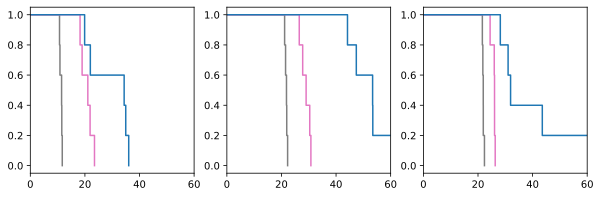

In [6]:
fig, axs = plt.subplots(figsize=(10, 3), ncols=3)
plot_survival([baseline_standalone_d2_h0_times, baseline_standalone_d0_h50_times, baseline_layered_d2_h50_times], axs[0])
plot_survival([dfs_standalone_d2_h0_times, dfs_standalone_d0_h50_times, dfs_layered_d2_h50_times], axs[1])
plot_survival([bfs_standalone_d2_h0_times, bfs_standalone_d0_h50_times, bfs_layered_d2_h50_times], axs[2])
fig.savefig('./plots/layered_survival_equiSmall.svg', transparent=True)

In [7]:
# Baseline attacker
baseline_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/baseline_standalone_d0_h50'))
baseline_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/baseline_standalone_d2_h0'))
baseline_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/baseline_layered_d2_h50'))

# DFS attacker
dfs_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/dfs_standalone_d0_h50'))
dfs_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/dfs_standalone_d2_h0'))
dfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/dfs_layered_d2_h50'))

# BFS attacker
bfs_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/bfs_standalone_d0_h50'))
bfs_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/bfs_standalone_d2_h0'))
bfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/bfs_layered_d2_h50'))

baseline_layered_d2_h50_times = get_data_exfiltration_times(baseline_layered_d2_h50, expected_files=47)
baseline_standalone_d0_h50_times = get_data_exfiltration_times(baseline_standalone_d0_h50, expected_files=47)
baseline_standalone_d2_h0_times = get_data_exfiltration_times(baseline_standalone_d2_h0, expected_files=47)

dfs_layered_d2_h50_times = get_data_exfiltration_times(dfs_layered_d2_h50, expected_files=47, timeout_time_min=90)
dfs_standalone_d0_h50_times = get_data_exfiltration_times(dfs_standalone_d0_h50, expected_files=47, timeout_time_min=90)
dfs_standalone_d2_h0_times = get_data_exfiltration_times(dfs_standalone_d2_h0, expected_files=47, timeout_time_min=90)

bfs_layered_d2_h50_times = get_data_exfiltration_times(bfs_layered_d2_h50, expected_files=47, timeout_time_min=90)
bfs_standalone_d0_h50_times = get_data_exfiltration_times(bfs_standalone_d0_h50, expected_files=47, timeout_time_min=90)
bfs_standalone_d2_h0_times = get_data_exfiltration_times(bfs_standalone_d2_h0, expected_files=47, timeout_time_min=90)

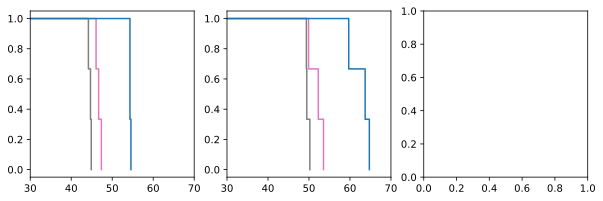

In [8]:
fig, axs = plt.subplots(figsize=(10, 3), ncols=3)
plot_survival([baseline_standalone_d2_h0_times, baseline_standalone_d0_h50_times, baseline_layered_d2_h50_times], axs[0], x_axis_low=30, x_axis_high=70)
plot_survival([dfs_standalone_d2_h0_times, dfs_standalone_d0_h50_times, dfs_layered_d2_h50_times], axs[1], x_axis_low=30, x_axis_high=70)
# plot_survival([bfs_standalone_d2_h0_times, bfs_standalone_d0_h50_times, bfs_layered_d2_h50_times], axs[2], x_axis_low=30, x_axis_high=70)
fig.savefig('./plots/layered_survival_equiLarge.svg', transparent=True)

In [30]:
# Baseline attacker
baseline_standalone_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/baseline_standalone_d2_h50'))
baseline_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/baseline_layered_d2_h50'))

# DFS attacker
dfs_standalone_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/dfs_standalone_d2_h50'))
dfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/dfs_layered_d2_h50'))

# BFS attacker
bfs_standalone_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/bfs_standalone_d2_h50'))
bfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxLarge/bfs_layered_d2_h50'))

baseline_layered_d2_h50_times = get_data_exfiltration_times(baseline_layered_d2_h50, expected_files=45)
baseline_standalone_d2_h50_times = get_data_exfiltration_times(baseline_standalone_d2_h50, expected_files=45)

dfs_layered_d2_h50_times = get_data_exfiltration_times(dfs_layered_d2_h50, expected_files=45, timeout_time_min=90)
dfs_standalone_d2_h50_times = get_data_exfiltration_times(dfs_standalone_d2_h50, expected_files=45, timeout_time_min=90)

bfs_layered_d2_h50_times = get_data_exfiltration_times(bfs_layered_d2_h50, expected_files=45, timeout_time_min=90)
bfs_standalone_d2_h50_times = get_data_exfiltration_times(bfs_standalone_d2_h50, expected_files=45, timeout_time_min=90)

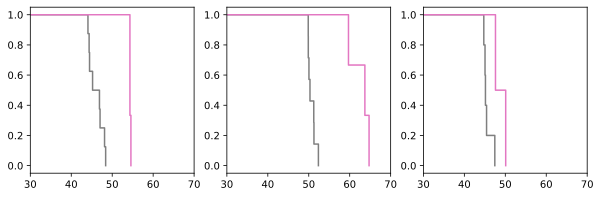

In [31]:
fig, axs = plt.subplots(figsize=(10, 3), ncols=3)
plot_survival([baseline_standalone_d2_h50_times, baseline_layered_d2_h50_times], axs[0], x_axis_low=30, x_axis_high=70)
plot_survival([dfs_standalone_d2_h50_times, dfs_layered_d2_h50_times], axs[1], x_axis_low=30, x_axis_high=70)
plot_survival([bfs_standalone_d2_h50_times, bfs_layered_d2_h50_times], axs[2], x_axis_low=30, x_axis_high=70)
fig.savefig('./plots/layered_survival_equiLarge.svg', transparent=True)

In [29]:
bfs_layered_d2_h50_times

,time_exfiltrated,survival,num_files
0,50.097112,1,48
1,47.601346,1,48


In [32]:
dfs_layered_d2_h50_times

,time_exfiltrated,survival,num_files
0,64.729421,1,48
1,59.701513,1,48
2,63.707398,1,48


In [34]:
baseline_layered_d2_h50_times

,time_exfiltrated,survival,num_files
0,54.326980,1,48
1,54.568447,1,48
2,54.327899,1,47
